In [51]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.5, random_state=42)
mlp = MLPClassifier(hidden_layer_sizes=[64 * 2 + 2] * 2, max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.9666295884315906

In [52]:
from nbis import nbis
from tqdm import tqdm
classifier = lambda X: mlp.predict_proba(X)
MAX_ITER = 500
for i, res in tqdm(enumerate(nbis(X0=X_train, func=classifier, outer_steps=MAX_ITER, ensemble=4)), total=MAX_ITER):
    pass

  0%|          | 0/500 [00:00<?, ?it/s]

100%|██████████| 500/500 [05:27<00:00,  1.53it/s]


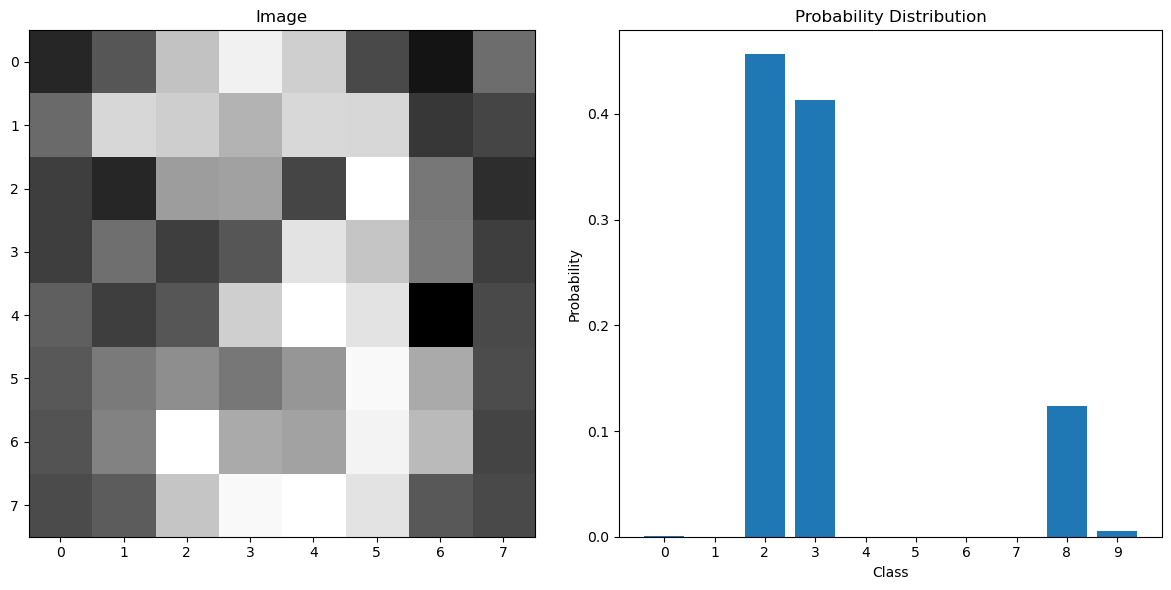

In [60]:
import matplotlib.pyplot as plt

idx = 58
proba = res.predict_proba(res.X[idx])[0]
proba_dict = {str(digits.target_names[i]): proba[i] for i in range(proba.shape[0])}
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axes[0].imshow(res.X[idx].reshape((8, 8)), cmap='Greys_r', interpolation='none')
axes[0].set_title('Image')
axes[1].bar(proba_dict.keys(), proba_dict.values())
axes[1].set_title('Probability Distribution')
axes[1].set_ylabel('Probability')
axes[1].set_xlabel('Class')

fig.tight_layout()
plt.show()